# Student perfermance  with KNN , SVM and Deep Learning

In [1]:
#importing libreraies packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 35)

## 1- Data gathering  

In [2]:
#import data set
data = pd.read_csv('student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [3]:
#shape of dataset 
print(data.shape)
#list of columns 
print(list(data.columns))

(395, 33)
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


## 2- Preparing data

In [4]:
#missing values
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
#import sklearn libray for cleaning and spliting the data set
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
#splitting data set into two seprate set "we're going to ask our model to predict G3 "
X = data.iloc[:, data.columns != 'G3' ]
y = data.iloc[:, data.columns == 'G3' ]

## Feature Engineering 

In [7]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2
label_encoder = LabelEncoder()
s = (X.dtypes == 'object')
object_cols = list(s[s].index)
k_best = SelectKBest(score_func=chi2, k=15)
X_feature= X.copy()
for col in object_cols:
    X_feature[col]=label_encoder.fit_transform(X[col])
k_best.fit(X_feature,y)

#print the score of each feature 
df_score = pd.Series(data=k_best.scores_, index=X.columns)
X_f = data[df_score.nlargest(15).index]
df_score

school         10.310678
sex            10.581662
age             2.277762
address         5.876113
famsize        12.429690
Pstatus         1.711150
Medu           13.894852
Fedu           10.375563
Mjob           14.807099
Fjob            5.013670
reason         29.724125
guardian        4.297163
traveltime      6.758151
studytime       6.231603
failures      140.934898
schoolsup      28.319018
famsup          5.303438
paid           16.129900
activities      7.601049
nursery         3.297083
higher          1.234479
internet        2.999142
romantic       20.089526
famrel          2.110686
freetime        4.479465
goout          10.472494
Dalc           17.082868
Walc           28.444167
health         10.176668
absences      648.166848
G1            319.716427
G2            451.680952
dtype: float64

<AxesSubplot:>

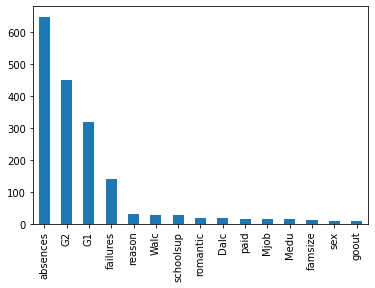

In [8]:
#Top 15  feature score
df_score.nlargest(15).plot(kind='bar')

In [6]:
#spliting dataset into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.2, random_state=0)

In [7]:
##encoded categorical columns values for prediction model 
#s = (X_f.dtypes == 'object')
s = (X.dtypes == 'object')
object_cols = list(s[s].index)
label_X_train = X_train.copy()
label_X_valid = X_test.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_test[col])

## 4- Exploratory data Analysis

In [12]:
print(data['G3'].value_counts())

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64


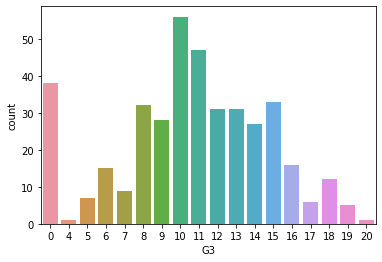

In [23]:
sns.countplot(x='G3', data=data)
plt.show()

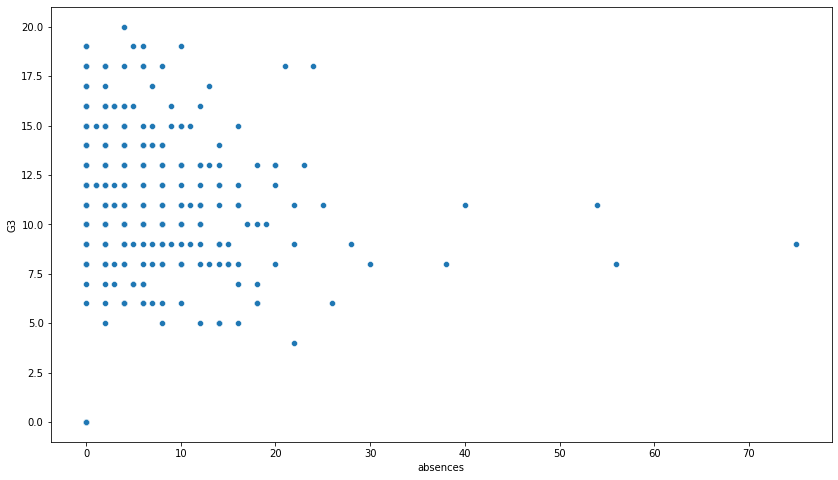

In [29]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data['absences'], y=data['G3'])
plt.show()

<Figure size 1008x576 with 0 Axes>

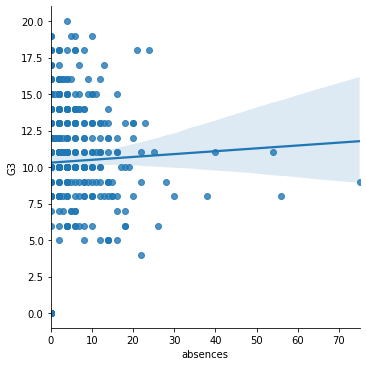

In [30]:
plt.figure(figsize=(14, 8))
sns.lmplot(x="absences", y="G3", data=data)
plt.show()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


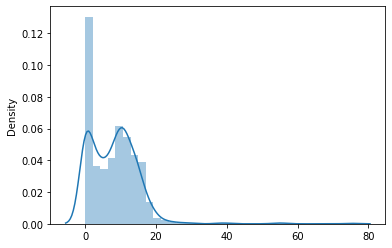

In [33]:
sns.distplot(a=[data.absences, data.G3])
plt.show()

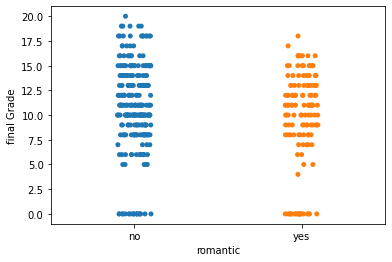

In [34]:
sns.stripplot(x=data['romantic'], y=data['G3'])
plt.ylabel('final Grade')
plt.show()

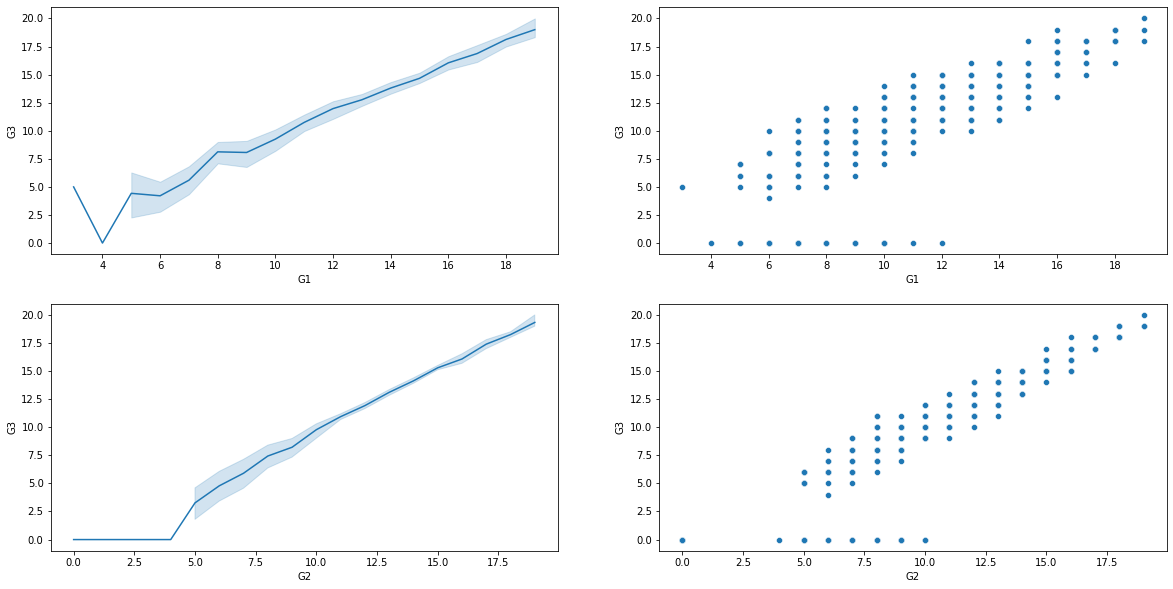

In [15]:
fg, axs = plt.subplots(2,2, figsize=(20,10))
b1 = sns.lineplot(x='G1', y='G3', data=data, ax=axs[0,0])
b2 = sns.scatterplot(x='G1', y='G3', data=data, ax=axs[0,1])
b3 = sns.lineplot(x='G2', y='G3', data=data, ax=axs[1,0])
b4 = sns.scatterplot(x='G2', y='G3', data=data, ax=axs[1,1])

## 5- building a Machine Learning Model 

In [8]:
#From a module called neighbors will import class named KNeighborsClassifier (KKN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
msv =SVR(kernel = 'rbf') 


## 6-Model Evaluation & optimization 

In [9]:
#
sc = StandardScaler()
label_X_train = sc.fit_transform(label_X_train)
label_X_valid = sc.transform(label_X_valid)
ml=classifier.fit(label_X_train, np.ravel(y_train,order='C'))
msv.fit(label_X_train, np.ravel(y_train,order='C'))


SVR()

## 7- Prediction 

In [10]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import r2_score
y_pred = ml.predict(label_X_valid)
predsvm = msv.predict(label_X_valid)
print("accuracy of model KNN :\n", accuracy_score(y_test, y_pred))
print("accuracy of model svm :\n", r2_score(y_test, predsvm))


accuracy of model KNN :
 0.17721518987341772
accuracy of model svm :
 0.5476011725428744


In [13]:
pd.DataFrame(predsvm,np.ravel(y_test,order='C'))

,0
14,14.250185
10,10.920000
9,10.017727
15,15.388001
16,15.967257
...,...
9,9.301568
0,8.957442
11,11.016707
18,16.722490


## Deep learning with keras

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend
def build_regressor():
    regressor = Sequential()
    
    regressor.add(Dense(units=32, input_dim=32, activation='relu'))
    regressor.add(Dense(units=32, activation='relu'))
    regressor.add(Dense(units=1))
    
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])
    return regressor
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=500)

In [12]:
# Scale the train and test data before training the model
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#X_train = ss.fit_transform(X_train)
#y_train = ss.fit_transform(np.array(y_train).reshape(-1, 1))

#X_test = ss.fit_transform(X_test)
#y_test = ss.fit_transform(np.array(y_test).reshape(-1,1))

results=regressor.fit(label_X_train, np.ravel(y_train,order='C'))


Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 139.1637 - mae: 11.0426
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 122.6952 - mae: 10.1935
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 105.5533 - mae: 9.5185
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 93.2141 - mae: 8.8054
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 76.3478 - mae: 8.0035
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 55.5618 - mae: 6.7607
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 40.7338 - mae: 5.6206
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 24.3115 - mae: 4.2803
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 14.4657 - mae: 3.1009
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 9.7140 - mae: 2.3886
Epoch 11/500
16/16 [=========================

16/16 [==============================] - 0s 1ms/step - loss: 0.5397 - mae: 0.5184
Epoch 87/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6215 - mae: 0.5769
Epoch 88/500
16/16 [==============================] - ETA: 0s - loss: 0.5305 - mae: 0.547 - 0s 1ms/step - loss: 0.5525 - mae: 0.5246
Epoch 89/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4819 - mae: 0.5030
Epoch 90/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4167 - mae: 0.4882
Epoch 91/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5358 - mae: 0.5135
Epoch 92/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4556 - mae: 0.4865
Epoch 93/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4523 - mae: 0.4858
Epoch 94/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4024 - mae: 0.4645
Epoch 95/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4703 - mae: 0.4922
Epoch 96/500
16/16 [=====

16/16 [==============================] - 0s 1ms/step - loss: 0.0426 - mae: 0.1347
Epoch 172/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0327 - mae: 0.1184
Epoch 173/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0349 - mae: 0.1226
Epoch 174/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0335 - mae: 0.1188
Epoch 175/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0353 - mae: 0.1240
Epoch 176/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0305 - mae: 0.1141
Epoch 177/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0326 - mae: 0.1147
Epoch 178/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0352 - mae: 0.1206
Epoch 179/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0317 - mae: 0.1147
Epoch 180/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0262 - mae: 0.1081
Epoch 181/500
16/16 [==============================] -

16/16 [==============================] - 0s 1ms/step - loss: 0.0022 - mae: 0.0294
Epoch 257/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0275
Epoch 258/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0280
Epoch 259/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0021 - mae: 0.0284
Epoch 260/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0020 - mae: 0.0316
Epoch 261/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0299
Epoch 262/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0018 - mae: 0.0295
Epoch 263/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0021 - mae: 0.0310
Epoch 264/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0027 - mae: 0.0329
Epoch 265/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0015 - mae: 0.0280
Epoch 266/500
16/16 [==============================] -

16/16 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0285
Epoch 339/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0015 - mae: 0.0295
Epoch 340/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0248
Epoch 341/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0013 - mae: 0.0253
Epoch 342/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0021 - mae: 0.0336
Epoch 343/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0472
Epoch 344/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0477
Epoch 345/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0030 - mae: 0.0392
Epoch 346/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0047 - mae: 0.0474
Epoch 347/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0077 - mae: 0.0584
Epoch 348/500
16/16 [==============================] -

16/16 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0876
Epoch 424/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0874
Epoch 425/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0162 - mae: 0.0941
Epoch 426/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0190 - mae: 0.1070
Epoch 427/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0192 - mae: 0.1049
Epoch 428/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0229 - mae: 0.1120
Epoch 429/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0307 - mae: 0.1325
Epoch 430/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0289 - mae: 0.1283
Epoch 431/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0244 - mae: 0.1192
Epoch 432/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0213 - mae: 0.1077
Epoch 433/500
16/16 [==============================] -

In [13]:
y_regressor_pred = regressor.predict(label_X_valid)
print("accuracy of model deep learning :\n", r2_score(y_test, y_regressor_pred))

accuracy of model deep learning :
 0.6213464497609287
